In [1]:
import polars as pl

In [2]:
!ls ../kkdata

light_test_source_labels.csv
light_train_source_labels.csv
light_train_target_labels.csv
sample.csv
test_source_events.csv
train_source_events.csv
train_target_events.csv


In [3]:
!ls ../kkdata2

light_test_source_labels.csv
light_train_source_labels.csv
light_train_target_labels.csv
sample.csv
test_source_events.csv
train_source_events.csv
train_target_events.csv


In [4]:
df_source = pl.read_csv("../kkdata/train_source_events.csv")
df_target = pl.read_csv("../kkdata/train_target_events.csv")

In [5]:
df_source

user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
i64,i64,i64,i64,f64,i64,i64,i64,i64,i64
0,525,2328,384,1.6489e9,1361,1,0,0,1
0,525,2328,384,1.6489e9,2,0,0,0,1
0,525,2400,68,1.6490e9,2,0,0,0,1
0,525,2400,68,1.6490e9,20,9,0,0,1
0,532,2401,68,1.6490e9,8,10,2,1,4
0,532,2401,68,1.6490e9,19,10,2,1,4
0,532,2403,68,1.6490e9,2432,10,2,1,4
0,532,2403,68,1.6490e9,297,1,2,1,4
0,532,2403,68,1.6490e9,4,10,2,1,4


In [6]:
df_source.shape

(9714103, 10)

In [7]:
df_target.shape

(374170, 10)

In [8]:
df_source.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

### How many unique user id?

In [9]:
len(set(df_source['user_id']))

30460

In [10]:
df_source['user_id'].unique().shape

(30460,)

### How many total play time?

In [11]:
df_source['played_duration'].sum()

9346722696

### Time interval?

In [12]:
df_source['event_time'].min()

1640998801.205

In [13]:
df_source['event_time'].max()

1663376398.588

In [14]:
df_source['event_time'].describe()

statistic,value
str,f64
"""count""",9.714103e6
"""null_count""",0.0
"""mean""",1.6526e9
"""std""",6.7707e6
"""min""",1.6410e9
"""25%""",1.6462e9
"""50%""",1.6535e9
"""75%""",1.6586e9
"""max""",1.6634e9


### How many event per user?

In [15]:
df_source.group_by('user_id').count().sort(by='count')

user_id,count
i64,u32
16304,1
20800,1
12144,1
19617,1
13361,1
22545,1
26769,1
6737,1
27634,1


In [16]:
# total time by user
df_source[['user_id', 'played_duration']].group_by('user_id').sum().sort('played_duration')

user_id,played_duration
i64,i64
12144,1
18979,1
27079,2
18397,2
27634,3
25240,3
14803,4
15717,4
11003,4


In [17]:
source_total = df_source[['user_id', 'played_duration']].group_by('user_id').sum()
target_total = df_target[['user_id', 'played_duration']].group_by('user_id').sum()

In [18]:
df_total = source_total.join(target_total, on='user_id')
df_total

user_id,played_duration,played_duration_right
i64,i64,i64
10768,97749,20054
23200,11520,423
29376,854656,34938
4048,65355,3967
30256,189847,11496
3808,156986,5797
5568,25105,5350
12352,135225,6363
2720,822968,19249


In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

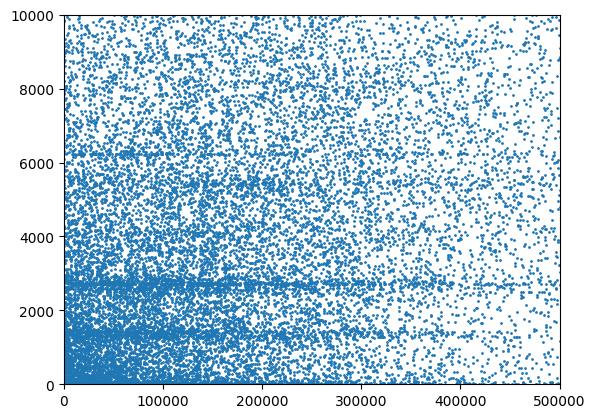

In [21]:
plt.xlim(0, 500000)
plt.ylim(0, 10000)
plt.scatter(df_total['played_duration'], df_total['played_duration_right'], s=1)

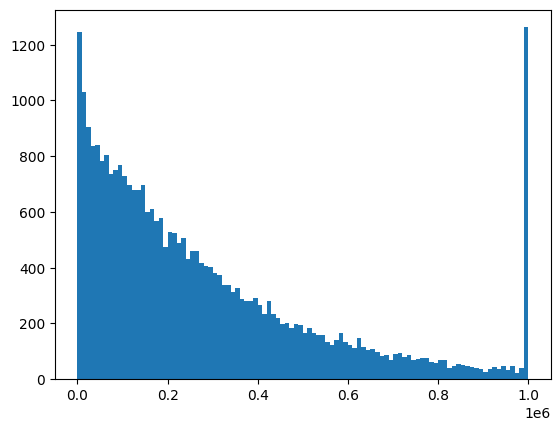

In [33]:
plt.hist(df_total['played_duration'].clip(0, 1000000), bins=100);

In [44]:
df_total.describe([0.05, 0.5, 0.95])

describe,user_id,played_duration,played_duration_right
str,f64,f64,f64
"""count""",30460.0,30460.0,30460.0
"""null_count""",0.0,0.0,0.0
"""mean""",15229.5,306852.353775,12065.788247
"""std""",8793.188936,379116.98106,18612.75255
"""min""",0.0,1.0,1.0
"""5%""",1523.0,12544.0,85.0
"""50%""",15230.0,204118.0,6148.0
"""95%""",28937.0,921558.0,43682.0
"""max""",30459.0,1.1995926e7,486812.0


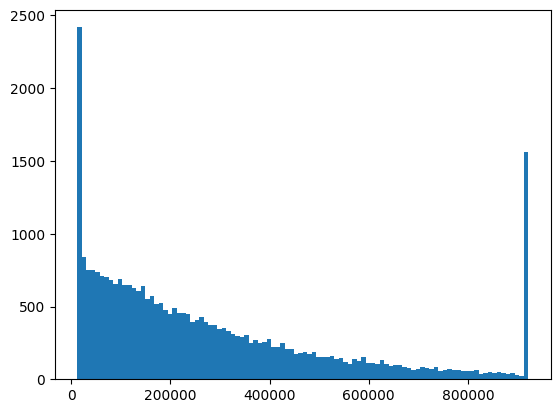

In [41]:
plt.hist(df_total['played_duration'].clip(12544,921558), bins=100);

In [47]:
(df_total['played_duration']/3600).round()

played_duration
f64
27.0
3.0
237.0
18.0
53.0
44.0
7.0
38.0
229.0


In [72]:
#df_total['played_duration_hour'] = (df_total['played_duration']/3600).round()
df_total = df_total.with_columns( played_hour = (df_total['played_duration']/3600).round())
df_total

user_id,played_duration,played_duration_right,played_hour
i64,i64,i64,f64
10768,97749,20054,54.0
23200,11520,423,6.0
29376,854656,34938,475.0
4048,65355,3967,36.0
30256,189847,11496,105.0
3808,156986,5797,87.0
5568,25105,5350,14.0
12352,135225,6363,75.0
2720,822968,19249,457.0


In [73]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').mean().sort('played_hour')
df_total_gb

played_hour,played_duration_right
f64,f64
0.0,7938.491979
1.0,4586.728814
2.0,6668.769874
3.0,6850.741627
4.0,6517.778325
5.0,7179.625
6.0,6548.80402
7.0,7009.102857
8.0,5840.724868


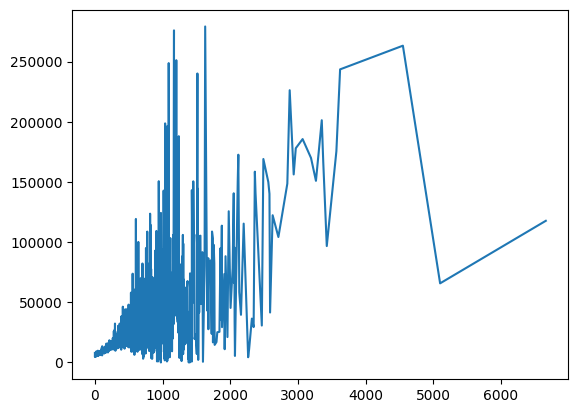

In [74]:
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

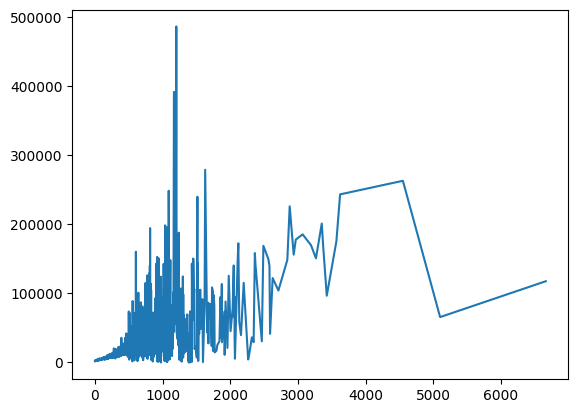

In [75]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').quantile(0.5).sort('played_hour')
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

In [23]:
source_count = df_source.group_by('user_id').count()
target_count = df_target.group_by('user_id').count()
df_count = source_count.join(target_count, on='user_id')
df_count

user_id,count,count_right
i64,u32,u32
27008,87,2
23856,189,5
18112,126,2
26752,129,44
22352,136,5
19744,898,14
13280,242,30
15856,238,26
8416,37,9


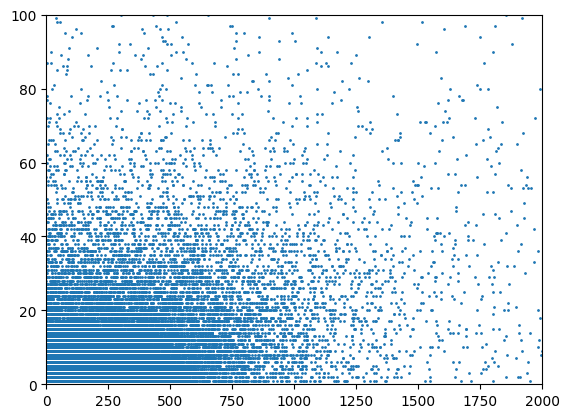

In [26]:
plt.xlim(0, 2000)
plt.ylim(0, 100)
plt.scatter(df_count['count'], df_count['count_right'], s=1)

### Similarity between users